# **Convolution**



*   Convolution, input görüntüsüne feature algılayıcıları uygulamaktır.
*   Konsepti basitleştirmek için aşağıdaki şekilde 0 ve 1 dizisi olarak temsil edilen bir giriş görüntüsü olarak gülen bir yüz alalım.

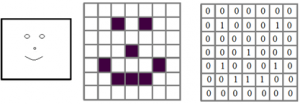







*   Feature algılayıcı da benzer şekilde bir dizi sayıdır(array).
*   Onu görüntünün üzerine kaydırırız ve her bir feature algılayıcı için görüntünün bir özelliğini temsil eden yeni bir sayı dizisi üretiriz.

*   Bu nedenle, bir input görüntüsü ile bir feature map ile sonuçlanan bir feature dedektörü arasındaki işlem, aşağıda ki şekilde gösterildiği gibi Convolution'dır.
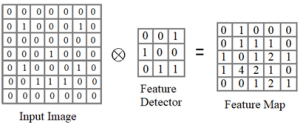





*   Feature algılayıcılar kadar çok feature maps yaparız, yukarıdaki evrişimi farklı öznitelik algılayıcılarla tekrarlayan bir convolution katmanı elde ederiz.
*  Özellikle, ilk convolution katmanını oluşturmak için Keras'tan Conv2D() işlevini kullanıyoruz.

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

*   Son argüman aktivasyon fonksiyonudur.
*   Özellik haritalarındaki tüm negatif piksel değerlerini değiştirmek için ReLU kullanıyoruz.

*   Bu, convolutionda kullanılan parametrelere bağlı olarak,  feature  haritalarında negatif pikseller elde edebilmemiz gibidir.
*   Negatif piksellerin değiştirilmesi, doğrusal olmayan bir sınıflandırma problemi için doğrusal olmayanlık ekler.





# **Max pooling**

*  Max pooling, bir tabloyu kaydırarak bir özellik haritasının boyutunu küçültmektir.
*  Örneğin (2,2) ve tablodaki maksimum değeri almak.

*   Aşağıdaki şekilde gösterildiği gibi 2 üzeri 1 özellik haritası (5,5) olan bir tabloyu kaydırırsak, boyutu küçültülmüş (3.3) bir özellik haritası elde ederiz.


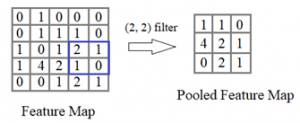


*   Her özellik haritasında maksimum pooling yinelemek, bir pooling katmanı oluşturur.
*  Temel olarak, maksimum pooling, görüntülerdeki ana özellikleri ve uzamsal yapı bilgilerini kaybetmeden tamamen bağlantılı katmanlardaki düğüm sayısını azaltmaktır.


In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

# **Flattening**

*  Flattening, aşağıdaki şekilde gösterildiği gibi, tamamen bağlantılı katmanlar için girdi olarak havuza alınan tüm özellik haritalarını tek bir vektörde almaktır.

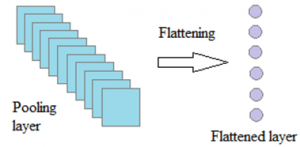



*   Her biri görüntünün belirli bir özelliğini temsil eden convolution çeşitli özellik haritaları elde ederiz.
*  Bu nedenle, düzleştirilmiş(flattened) vektördeki her düğüm, girdi görüntüsünün belirli bir ayrıntısını temsil eder.







In [ ]:
model.add(Flatten())

# **Full connection**
*  Yukarıdakilerle bir görüntüyü tek boyutlu bir vektöre dönüştürdük.
*  Şimdi bu vektörü girdi katmanı olarak kullanarak bir sınıflandırıcı yapacağız.
*  Gizli bir katman oluşturacağız. output_dim, gizli katmandaki düğüm sayısıdır.
*  Başlamak için 128'i seçiyoruz ve yaygın bir uygulama olarak aktivasyon işlevi olarak ReLU'yu kullanıyoruz.





In [ ]:
model.add(Dense(output_dim = 128, activation = ‘relu’))

*  Bundan sonra bir çıktı katmanı ekliyoruz. İkili sınıflandırma için output_dim 1'dir ve aktivasyon işlevi Sigmoid'dir.



In [ ]:
classifier.add(Dense(output_dim =1, activation = ‘sigmoid’))

# **Final model structure**
*  Tüm katmanlar eklenmiş olarak bir SGD algoritması, bir loss function ve performance metricc seçerek CNN'yi derleyelim.
*  İkili sınıflandırma için binary_crossentropy kullanıyoruz ve çoklu sınıflandırma problemleri için categorical_crossentropy kullanıyoruz.





In [ ]:
classifier.compile(optimizer = ‘adam’, loss = ‘binary_crossentropy’, metrics =’accuracy’)

*  Overfitting önlenmesi adına image augmentation'a ihtiyacımız var. Mesela rotating,flipping ya da shearing vs.(görüntü sayısını arttırmak adına)
*  Eğitim görüntülerini gruplara(batches) böler ve her grup, daha çeşitli görüntüler elde etmek için rastgele seçilen görüntüler üzerinde rastgele görüntü dönüşümü uygular.





In [ ]:
train_datagen=ImageDataGenerator(resclae=1./255,
                                 shear_Range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_set=train_datagen.flow_from_directory('dataset/training_set',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='binary')
test_set=test_datagen.flow_from_directory('dataset/test_set',
                                          target_size=(64,64),
                                          batch_size=32,
                                          class_mode='binary')
model.fit_generator(train_set,steps_per_epoch=800/32,epochs=25,
                    validation_data=test_set,validation_steps=2000/32)

*  Doğruluğu artırmak ve overfitting azaltmak için iki yöntem var. Daha fazla convolution veya dense katmanlar eklenebilir.



In [ ]:
model.add(Conv2D(32,3,3,activation='relu'))
model.add(Maxpooling2D(pool_size=(2,2)))


**Prediction**

In [ ]:
import numpy as np
from keras.preprocessing import imagetest_image = image.load_img(‘dataset/single_prediction/cat_or_dog_1.jpg’, target_size = (64, 64))

In [ ]:
test_image = image.img_to_array(test_image)

In [ ]:
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
result = model.predict(test_image)

In [ ]:
training_set.class_indices